# Feature Engineering and Visualization of Spotify Packets

In [2]:
import pandas as pd

### Read Data

In [4]:
app_df = pd.read_csv('../data/spotify_app_control_sorted.csv', index_col=0)
web_df = pd.read_csv('../data/spotify_web_control_sorted.csv', index_col=0)
app_df.head()

,time,protocol,src_ip,dst_ip,src_port,dst_port,length,payload_size,query_name,spotify_or_not,interarrival_time,dst_interarrival_time
0,1.712707e+09,58.0,fe80::82ab:4dff:febf:19e1,fe80::813:7ec4:1375:15d9,NaN,NaN,32.0,NaN,NaN,0,NaN,NaN
1,1.712707e+09,58.0,fe80::813:7ec4:1375:15d9,fe80::82ab:4dff:febf:19e1,NaN,NaN,24.0,NaN,NaN,0,0.000159,NaN
2,1.712707e+09,17.0,2600:1700:1420:3b60:e46c:b485:479d:6b1a,2600:1700:1420:3b60::1,61799.0,53.0,51.0,43.0,gateway.fe2.apple-dns.net.,0,0.080788,NaN
3,1.712707e+09,17.0,2600:1700:1420:3b60:e46c:b485:479d:6b1a,2600:1700:1420:3b60::1,52311.0,53.0,51.0,43.0,gateway.fe2.apple-dns.net.,0,0.000199,0.000199
4,1.712707e+09,17.0,2600:1700:1420:3b60::1,2600:1700:1420:3b60:e46c:b485:479d:6b1a,53.0,52311.0,83.0,75.0,gateway.fe2.apple-dns.net.,0,0.004130,NaN


interarrival time is already calculated from `feature_extraction.py`.

### Exploratory Data Analysis (EDA)

In [15]:
print('######### Spotify App df #########')
print('Avg Payload Size of Spotify Packets: ', app_df[app_df['spotify_or_not'] == 1]['payload_size'].mean())
print('Avg Payload Size of Non-Spotify Packets: ', app_df[app_df['spotify_or_not'] == 0]['payload_size'].mean())
print('Avg length of Spotify Packets: ', app_df[app_df['spotify_or_not'] == 1]['length'].mean())
print('Avg length of Non-Spotify Packets: ', app_df[app_df['spotify_or_not'] == 0]['length'].mean())
print('Avg interarrival_time of Spotify Packets: ', app_df[app_df['spotify_or_not'] == 1]['interarrival_time'].mean())
print('Avg interarrival_time of Non-Spotify Packets: ', app_df[app_df['spotify_or_not'] == 0]['interarrival_time'].mean())

print('\n######### Spotify web df #########')
print('Avg Payload Size of Spotify Packets: ', web_df[web_df['spotify_or_not'] == 1]['payload_size'].mean())
print('Avg Payload Size of Non-Spotify Packets: ', web_df[web_df['spotify_or_not'] == 0]['payload_size'].mean())
print('Avg length of Spotify Packets: ', web_df[web_df['spotify_or_not'] == 1]['length'].mean())
print('Avg length of Non-Spotify Packets: ', web_df[web_df['spotify_or_not'] == 0]['length'].mean())
print('Avg interarrival_time of Spotify Packets: ', web_df[web_df['spotify_or_not'] == 1]['interarrival_time'].mean())
print('Avg interarrival_time of Non-Spotify Packets: ', web_df[web_df['spotify_or_not'] == 0]['interarrival_time'].mean())

######### Spotify App df #########
Avg Payload Size of Spotify Packets:  63.538167938931295
Avg Payload Size of Non-Spotify Packets:  289.5794053662074
Avg length of Spotify Packets:  74.38403041825094
Avg length of Non-Spotify Packets:  306.53656242652244
Avg interarrival_time of Spotify Packets:  0.02177775223445527
Avg interarrival_time of Non-Spotify Packets:  0.0714842563320787

######### Spotify web df #########
Avg Payload Size of Spotify Packets:  77.1774193548387
Avg Payload Size of Non-Spotify Packets:  1186.7007619302233
Avg length of Spotify Packets:  85.1774193548387
Avg length of Non-Spotify Packets:  1213.6138611222177
Avg interarrival_time of Spotify Packets:  0.02821381245889969
Avg interarrival_time of Non-Spotify Packets:  0.010336215682319037


### Visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Packet Interarrival time in order

In [14]:
# extract indices of spotify_or_not == 1 to label for the plot
spotify_indices_app = app_df[app_df['spotify_or_not'] == 1].index
spotify_indices_web = web_df[web_df['spotify_or_not'] == 1].index

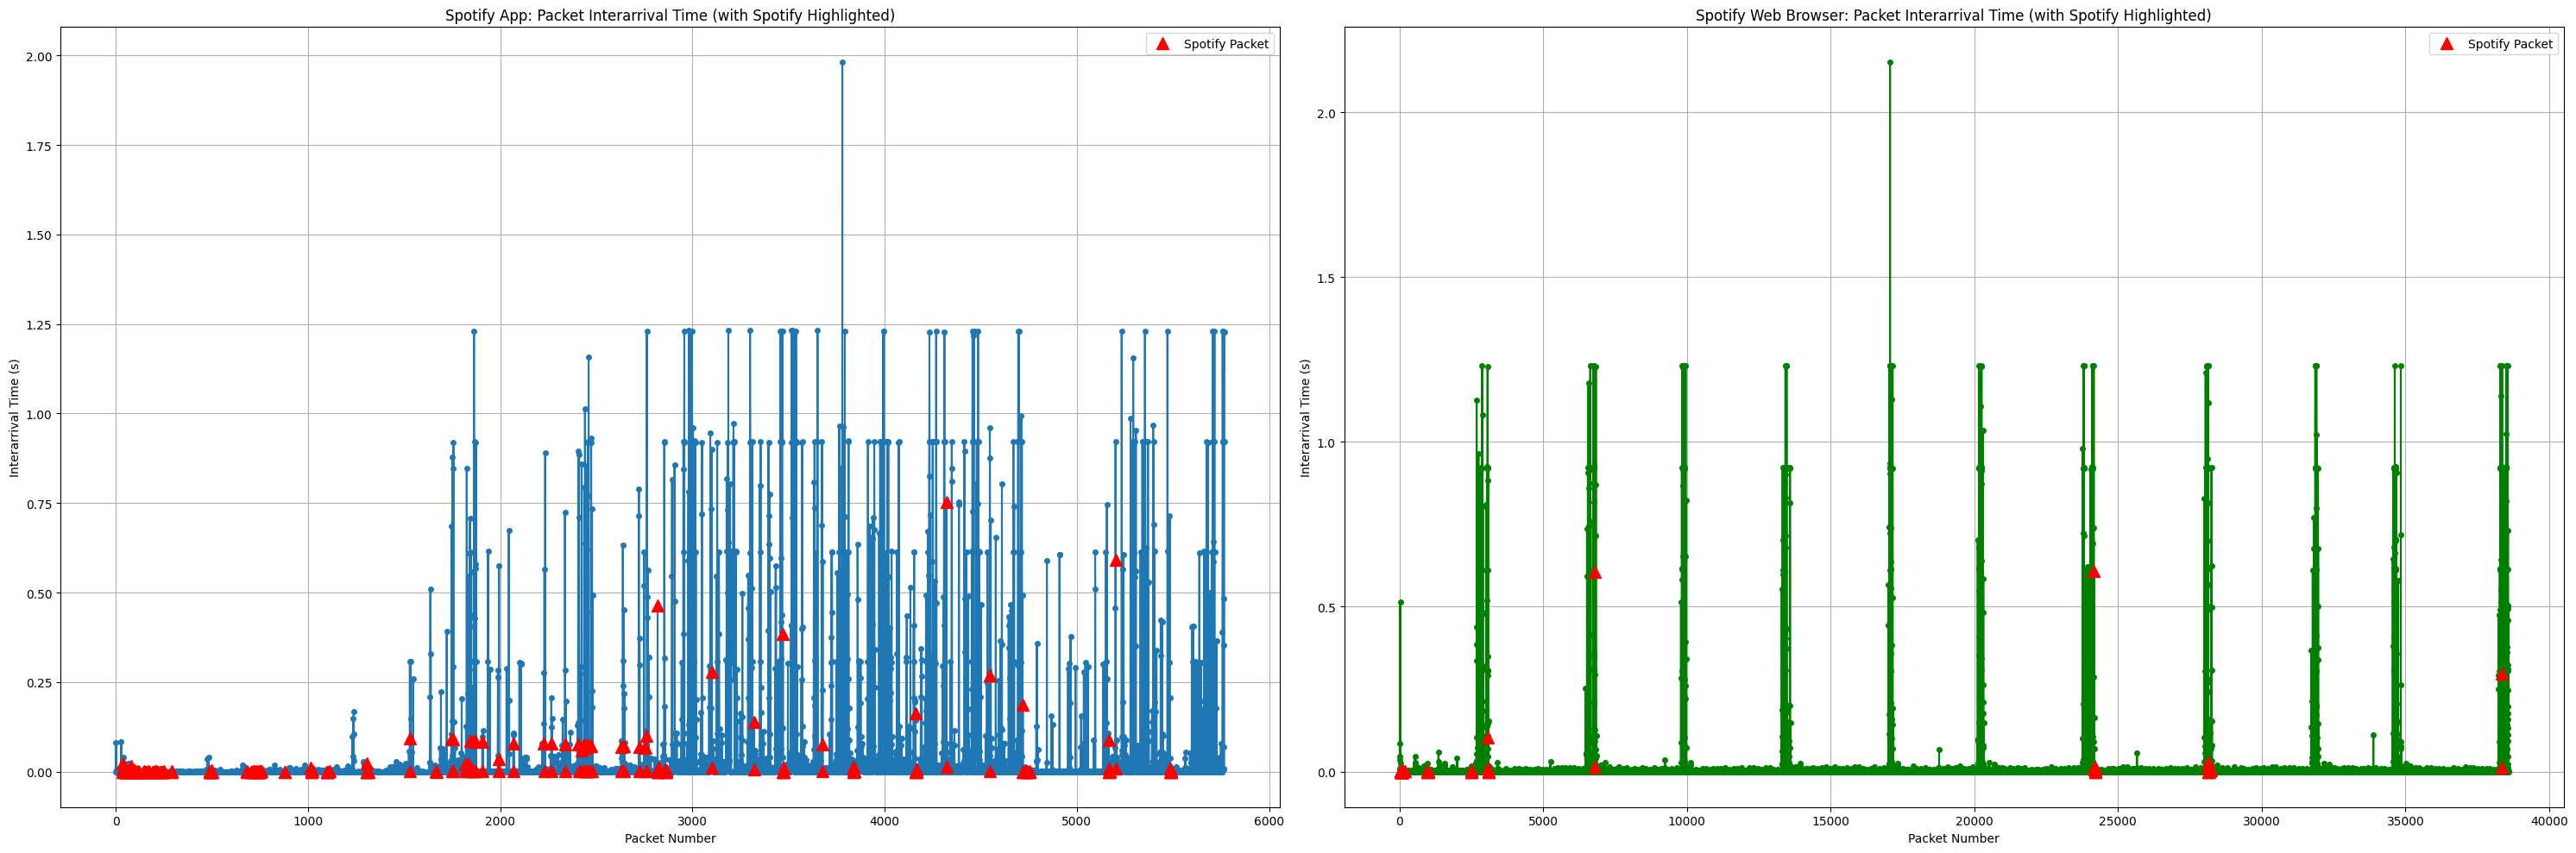

In [35]:
plt.figure(figsize=(30, 10))

# Line Plots
plt.subplot(1, 2, 1)
plt.plot(app_df['interarrival_time'], marker='o', linestyle='-', markersize=4)
plt.plot(spotify_indices_app, app_df.loc[spotify_indices_app, 'interarrival_time'], 'r^', markersize=10, label='Spotify Packet')
plt.title('Spotify App: Packet Interarrival Time (with Spotify Highlighted)')
plt.xlabel('Packet Number')
plt.ylabel('Interarrival Time (s)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(web_df['interarrival_time'], marker='o', linestyle='-', markersize=4, color='green')
plt.plot(spotify_indices_web, web_df.loc[spotify_indices_web, 'interarrival_time'], 'r^', markersize=10, label='Spotify Packet')
plt.title('Spotify Web Browser: Packet Interarrival Time (with Spotify Highlighted)')
plt.xlabel('Packet Number')
plt.ylabel('Interarrival Time (s)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


The data was collected by playing a song using Spotify API, let it run for 30 seconds, then stopped (again using API) and repeated 10 times.

#### Packet Interarrival Time Distribution

In [21]:
average_spotify_time_app = app_df[app_df['spotify_or_not'] == 1]['interarrival_time'].mean()
average_spotify_time_web = web_df[web_df['spotify_or_not'] == 1]['interarrival_time'].mean()

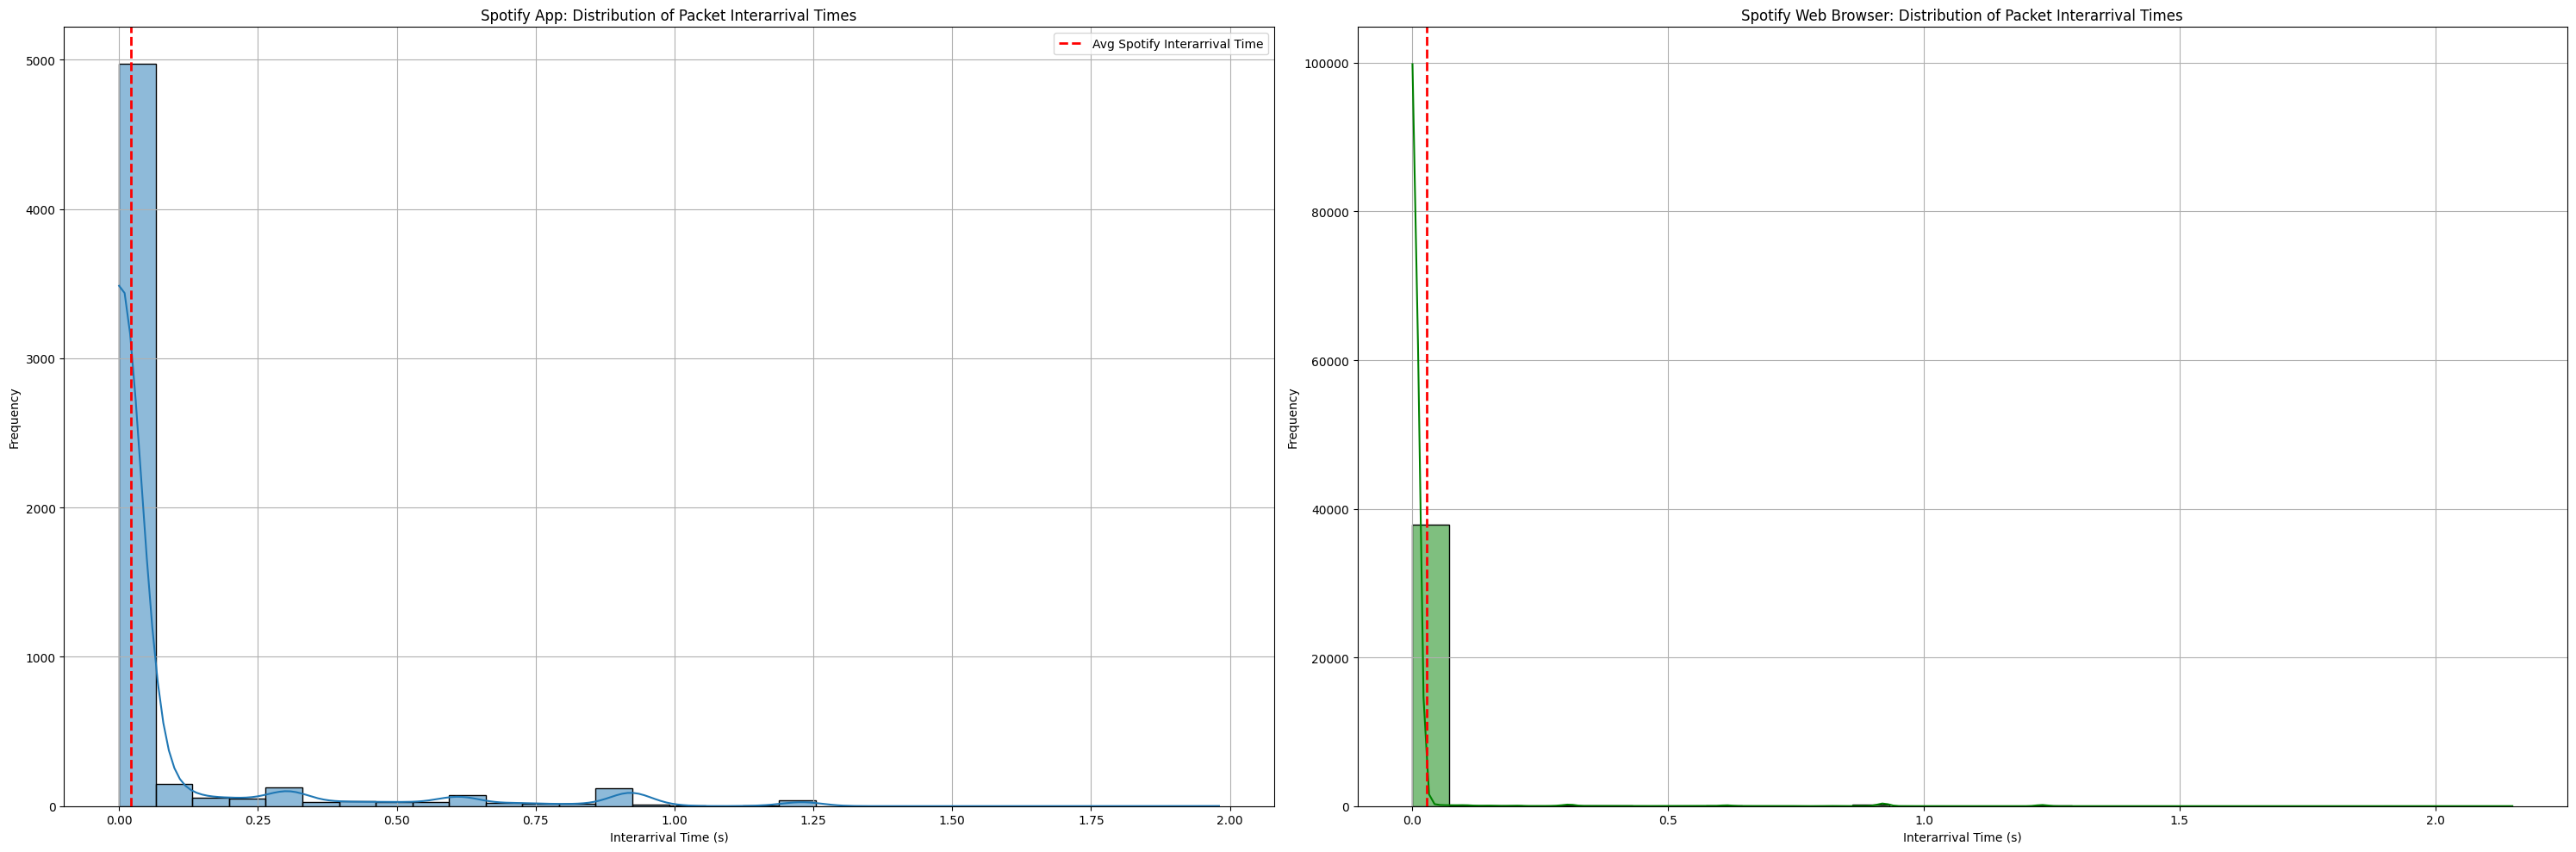

In [22]:
# Histograms
plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)
sns.histplot(app_df['interarrival_time'], bins=30, kde=True)
plt.axvline(x=average_spotify_time_app, color='red', linestyle='--', linewidth=2, label='Avg Spotify Interarrival Time')
plt.title('Spotify App: Distribution of Packet Interarrival Times')
plt.xlabel('Interarrival Time (s)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(web_df['interarrival_time'], bins=30, kde=True, color='green')
plt.axvline(x=average_spotify_time_web, color='red', linestyle='--', linewidth=2, label='Avg Spotify Interarrival Time')
plt.title('Spotify Web Browser: Distribution of Packet Interarrival Times')
plt.xlabel('Interarrival Time (s)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()